## Mixing System

Problem statement: The figure below shows a set of well-mixed mixing tanks. All the streams contain a binary mixture of substance $X$ and substance $Y$. Steams $A$, $B$ and $C$ are fed into the system from an upstream process.

Tanks $1$ and $2$ are drained by the force of gravity (assume flow is proportional to level), while the pump attached to the tank $3$ output is sized such that the level in tank $3$ does not affect the flow rate through the pump.

You may assume that the valves in lines $G$, $H$, $J$ and $L$ can manipulate those flows directly.

The density of substance $X$ is $ρX = 1000 kg/m3$ and the density of substance $Y$ is $ρY = 800 kg/m3.$

![Mixing System](./img/mixing_tanks.png)

## Steady state calculation

Find the steady state flow rates and compositions of all the streams given that 3 * Stream A is 1m3/h of substance X * Streams B and C are both 1m3/h of substance Y. * H=G,H=2J,J=2L.

In [1]:
px = 1000 # kg/me
py = 800 # kg/m3

A = 1*px
B = 1*py
C = 1*py

In [2]:
G = A + B + C

In [3]:
H = G
J = H/2
L = J / 2

In [4]:
F = G + H

In [5]:
D = A + L 

In [7]:
K = J - L
I = H - J

In [8]:
E = B + D + K

In [9]:
A, B, C, D, E, F, G, H, I, J, K, L

(1000,
 800,
 800,
 1650.0,
 3100.0,
 5200,
 2600,
 2600,
 1300.0,
 1300.0,
 650.0,
 650.0)

## Compositions

In [10]:
xA = 1
xB = 0
xC = 0

In [11]:
xG = (xA * A + xB * B + xC * C) / G

In [12]:
x3 = xF = xH = xI = xJ = xK = xL = xG

In [13]:
x1 = xD = (xA*A + xL*L)/D

In [14]:
x2 = xE = (xB*B + xD*D + xK*K)/E

## Design

In [15]:
A1 = A2 = A3 = 3

In [16]:
h1 = h2 = h3 = 1

In [17]:
k1 = D/h1

In [18]:
k2 = E/h2

In [19]:
k1, k2

(1650.0, 3100.0)

## Dynamic Simulation

In [20]:
import scipy.integrate

In [21]:
# Find volumes via tank geometry

V1 = A1*h1
V2 = A2*h2
V3 = A3*h3

In [23]:
# Masses from volumes - assume ideal mixing
M1 = V1/(x1/px + (1 - x1)/py)
M2 = V2/(x2/px + (1 - x2)/py)
M3 = V3/(x3/px + (1 - x3)/py)

In [27]:
y0 = [M1, M2, M3, M1*x1, M2*x2, M3*x3]

In [24]:
t = 0

In [25]:
def dMdt(t, y):
    M1, M2, M3, M1x1, M2x2, M3x3 = y

    if t <= 0:
        A = 1*px
    else:
        A = 1.5*px

    xD = x1 = M1x1/M1
    xE = x2 = M2x2/M2
    xF = x3 = M3x3/M3

    V1 = M1*(x1/px + (1 - x1)/py)
    V2 = M2*(x2/px + (1 - x2)/py)
    V3 = M3*(x3/px + (1 - x3)/py)

    h1 = V1/A1
    h2 = V2/A2
    h3 = V3/A3

    xH = xI = xJ = xK = xL = xG = x3

    D = k1*h1
    E = k2*h2

    dM1dt = A + L - D
    dM2dt = B + D + K - E
    dM3dt = C + E + I - F

    dM1x1dt = xA*A + xL*L - xD*D
    dM2x2dt = xB*B + xD*D + xK*K - xE*E
    dM3x3dt = xC*C + xE*E + xI*I - xF*F

    return dM1dt, dM2dt, dM3dt, dM1x1dt, dM2x2dt, dM3x3dt

In [28]:
dMdt(0, y0)

(0.0,
 4.547473508864641e-13,
 0.0,
 0.0,
 4.547473508864641e-13,
 -4.547473508864641e-13)

In [29]:
sol = scipy.integrate.solve_ivp(dMdt, (0, 10), y0)

In [30]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04  9.329e-04  9.262e-03  9.256e-02
             9.255e-01  1.863e+00  3.134e+00  4.834e+00  7.235e+00
             9.993e+00  1.000e+01]
        y: [[ 2.829e+03  2.829e+03 ...  3.752e+03  3.752e+03]
            [ 2.657e+03  2.657e+03 ...  3.150e+03  3.151e+03]
            ...
            [ 1.286e+03  1.286e+03 ...  1.845e+03  1.845e+03]
            [ 1.000e+03  1.000e+03 ...  2.943e+03  2.945e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 68
     njev: 0
      nlu: 0

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
M1, M2, M3, M1x1, M2x2, M3x3 = sol.y

In [35]:
x1 = M1x1/M1
x2 = M2x2/M2
x3 = M3x3/M3

V1 = M1*(x1/px + (1 - x1)/py)
V2 = M2*(x2/px + (1 - x2)/py)
V3 = M3*(x3/px + (1 - x3)/py)

h1 = V1/A1
h2 = V2/A2
h3 = V3/A3

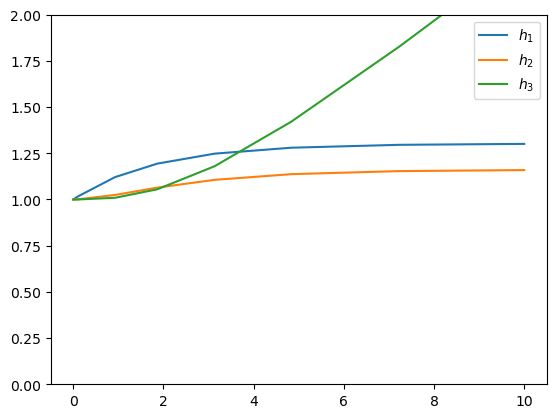

In [36]:
plt.plot(sol.t, h1,
         sol.t, h2,
         sol.t, h3)
plt.ylim(0, 2)
plt.legend(['$h_1$', '$h_2$', '$h_3$'])

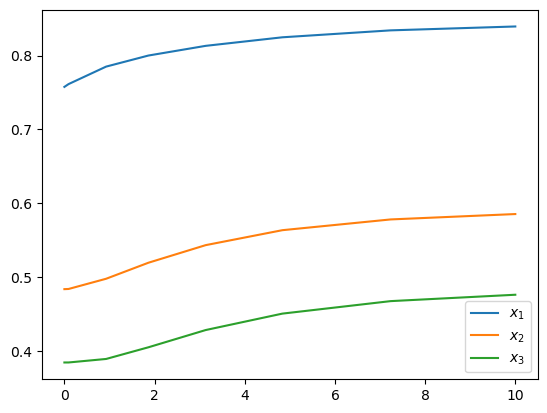

In [37]:
plt.plot(sol.t, x1,
         sol.t, x2,
         sol.t, x3)
plt.legend(['$x_1$', '$x_2$', '$x_3$'])